This notebook is used the Stack Overflow Annual Developer Survey in 2020 (https://insights.stackoverflow.com/survey)
The purpose of this notebook is to define and anwser 3 real world questions that are different than the example blog post from Josh Bernhard (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), which used 2017 data. Josh questions as below
      How to break into the field ?
      How do the different method related to salary and job satisfaction ?
      What biases did the respondents have in suggesting different methods ?
My plan for this notebook is to answer the below questions about United State Developers:
       What company type offer the highest pay ?
       what is the relationship of working remotely and salary ?
       Does big companies offer higher salary for the same job ?
       What are the top 3 skills for hardward and software engineers ?

In [1]:
# Import tools and data
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
df.head(2)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [2]:
# Import Schema information for detailed question information
schema = pd.read_csv('./survey_results_schema.csv')
pd.set_option("max_colwidth", None)
pd.set_option("max_rows", None)
schema.head(2)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""


In [3]:
# Extract only USA data
dfUSA = df.loc[df['Country']=="United States",  ['MajorUndergrad','YearsProgram','EmploymentStatus','Salary']]
# Drop all NA rows
dfUSA = dfUSA.dropna()
dfUSA.head(10)


,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0
76,Computer engineering or electrical/electronics engineering,20 or more years,Employed full-time,96283.0
81,Computer science or software engineering,17 to 18 years,Employed full-time,110000.0
83,Computer science or software engineering,20 or more years,Employed full-time,165000.0
99,Computer science or software engineering,20 or more years,Employed full-time,109400.0
103,Something else,1 to 2 years,Employed full-time,51000.0


In [4]:
# Consider only Full Time employment status

dfUSA_fulltime = dfUSA[dfUSA.EmploymentStatus== "Employed full-time"]

dfUSA_fulltime.head()

,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0


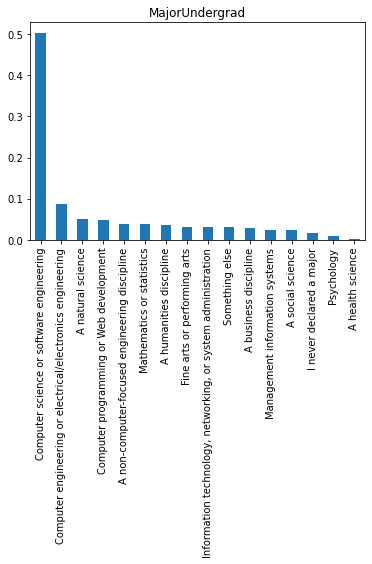

In [5]:
# Count of MajorUndergrad
major_undergrad  = dfUSA_fulltime.MajorUndergrad.value_counts()
# Bar chart proportion of MajorUndergrad
(major_undergrad/dfUSA_fulltime.shape[0]).plot(kind="bar");
plt.title("MajorUndergrad");

In [6]:
# Dropping all the " I dont know ", I prefer not to answer" or "Something else"
exclude = [ "I never declared a major", "Something else"]
major_new= dfUSA_fulltime[~dfUSA_fulltime['MajorUndergrad'].isin(exclude)]
major_new.head()



,MajorUndergrad,YearsProgram,EmploymentStatus,Salary
17,Computer science or software engineering,20 or more years,Employed full-time,130000.0
18,Computer science or software engineering,2 to 3 years,Employed full-time,82500.0
25,Computer science or software engineering,20 or more years,Employed full-time,175000.0
70,"Information technology, networking, or system administration",2 to 3 years,Employed full-time,65000.0
72,Computer science or software engineering,20 or more years,Employed full-time,120000.0


In [7]:
# Counting
major1 = major_new.MajorUndergrad.value_counts()
major1
#major1/major_new.shape[0].plot(kind = "bar");
#plt.title("MajorUndergrad")

Computer science or software engineering                        1815
Computer engineering or electrical/electronics engineering       312
A natural science                                                181
Computer programming or Web development                          176
A non-computer-focused engineering discipline                    141
Mathematics or statistics                                        138
A humanities discipline                                          132
Fine arts or performing arts                                     115
Information technology, networking, or system administration     112
A business discipline                                            104
Management information systems                                    91
A social science                                                  83
Psychology                                                        33
A health science                                                   7
Name: MajorUndergrad, dtype: int64

In [8]:
#major = major_new.set_index('MajorUndergrad')
#major


In [12]:
non_computer_focused =  ["A health science", "Psychology", "A social science", "Management information systems", "A business discipline", "Fine arts or performing arts","A humanities discipline", "Mathematics or statistics", "A non-computer-focused engineering discipline" , "A natural science" ]
computer_focused = ["Computer science or software engineering","Computer engineering or electrical/electronics engineering","Computer programming or Web development","Information technology, networking, or system administration"  ]

major_new['IsComputerRelated'] = np.where(major_new['MajorUndergrad'].isin (computer_focused), True, False)


<ipython-input-12-01626c8e38db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_new['IsComputerRelated'] = np.where(major_new['MajorUndergrad'].isin (computer_focused), True, False)
